In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_csv( 'adult.csv' )
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [33]:
data = data[ ~(data['workclass'] == '?')]
data = data[ ~(data['occupation'] == '?')]
data = data[ ~(data['native-country'] == '?')]

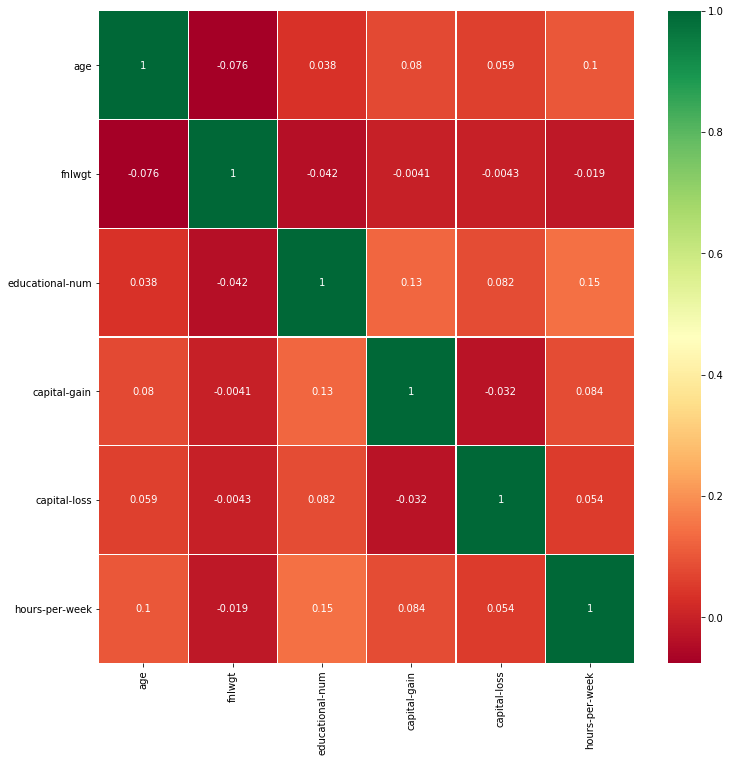

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [48]:
data['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

Тупо в печь со всеми признаками не буду, удалю признаки, которые я считаю не важными. Например, fnlwgt. Также если считать, что educational-num это уровень образованности, то не нужен дублирующий признак education. Отмечу, что признак native-country мало информативен, тк в основном там США, можно сделать преобразование на США и остальные, но их тоже удалю :) Остальные признаки можно было бы тоже причесать, но я их оставлю)

In [52]:
data.drop(['fnlwgt', 'education', 'native-country'], axis='columns', inplace=True)

In [64]:
X = pd.get_dummies( data, columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']  )
del X['income']
X.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,7,0,0,40,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
5,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [69]:
le.fit( data['income'] )
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [70]:
le.transform( ['<=50K', '>50K' ] )

array([0, 1])

In [74]:
y = pd.Series( data = le.transform( data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [54]:
data['relationship'].value_counts()

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [96]:
model = LogisticRegression()

In [97]:
model.fit( X_train, y_train )

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
model.score(X_train, y_train)

0.8357243552533378

In [101]:
model.score(X_test, y_test)

0.8354892205638474

In [99]:
y_pred = model.predict(X_test)

In [100]:
from sklearn.metrics import recall_score
display('Baseline Logistic Regression recall score', recall_score(y_test, y_pred))

'Baseline Logistic Regression recall score'

0.566340160284951

Показатель модели 56% ужасен, связано скорее всего с большим кол-вом признаков(46) для данного дата сета

In [102]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
svc.score(X_test, y_test)

0.7952459922609176

In [104]:
y_pred = svc.predict(X_test)

In [105]:
display('Baseline svc recall score', recall_score(y_test, y_pred))

'Baseline svc recall score'

0.26714158504007124

У svc все еще хуже (